<a href="https://colab.research.google.com/github/SanjayNithin2002/Phising-Detection-Using-Data-Mining-Techniques/blob/main/DMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import statsmodels.api as sm

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Phising-Detection-Using-Data-Mining-Techniques/dataset_small.csv")

In [3]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


In [4]:
df.isnull()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58641,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58642,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58643,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.max()[df.max() > 0].index
# definitely have to scale the data

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
       'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url',
       'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
       'qty_at_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip',
       'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory',
       'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory',
       'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory',
       'qty_plus_directory', 'qty_asterisk_directory', 'qty_dollar_directory',
       'qty_percent_directory', 'directory_length', 'qty_dot_file',
       'qty_hyphen_file',

In [8]:
df = df[df.max()[df.max() > 0].index]

In [9]:
df.head

<bound method NDFrame.head of        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0                2               0                  0              0   
1                4               0                  0              2   
2                1               0                  0              1   
3                2               0                  0              3   
4                1               1                  0              4   
...            ...             ...                ...            ...   
58640            1               0                  0              5   
58641            2               0                  0              0   
58642            5               6                  3              6   
58643            2               0                  0              0   
58644            2               0                  0              3   

       qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                         0       

In [10]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,0.043478,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.08,0.250,0.10,0.041655,0.0,0.055556,0.5,0.5,0.0,0.0
1,0.130435,0.000000,0.000000,0.045455,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.08,0.250,0.05,0.046041,1.0,0.055556,0.5,0.5,0.0,0.0
2,0.000000,0.000000,0.000000,0.022727,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.08,0.125,0.05,0.124871,0.0,0.055556,0.5,0.5,0.0,0.0
3,0.043478,0.000000,0.000000,0.068182,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.08,0.125,0.05,0.165970,1.0,0.055556,0.5,0.5,0.0,1.0
4,0.000000,0.028571,0.000000,0.090909,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.08,0.125,0.05,0.004514,1.0,0.111111,0.5,0.5,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,0.000000,0.000000,0.000000,0.113636,0.0,0.043478,0.000000,0.000000,0.0,0.0,...,0.08,0.125,0.10,0.006528,0.0,0.055556,0.5,0.5,0.0,1.0
58641,0.043478,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.08,0.250,0.00,0.001424,1.0,0.055556,0.5,0.5,0.0,0.0
58642,0.173913,0.171429,0.142857,0.136364,0.0,0.086957,0.023256,0.038462,0.0,0.0,...,0.08,0.125,0.05,0.012998,0.0,0.055556,0.5,0.5,0.0,1.0
58643,0.043478,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.24,0.125,0.25,0.003472,1.0,0.111111,0.5,0.5,0.0,0.0


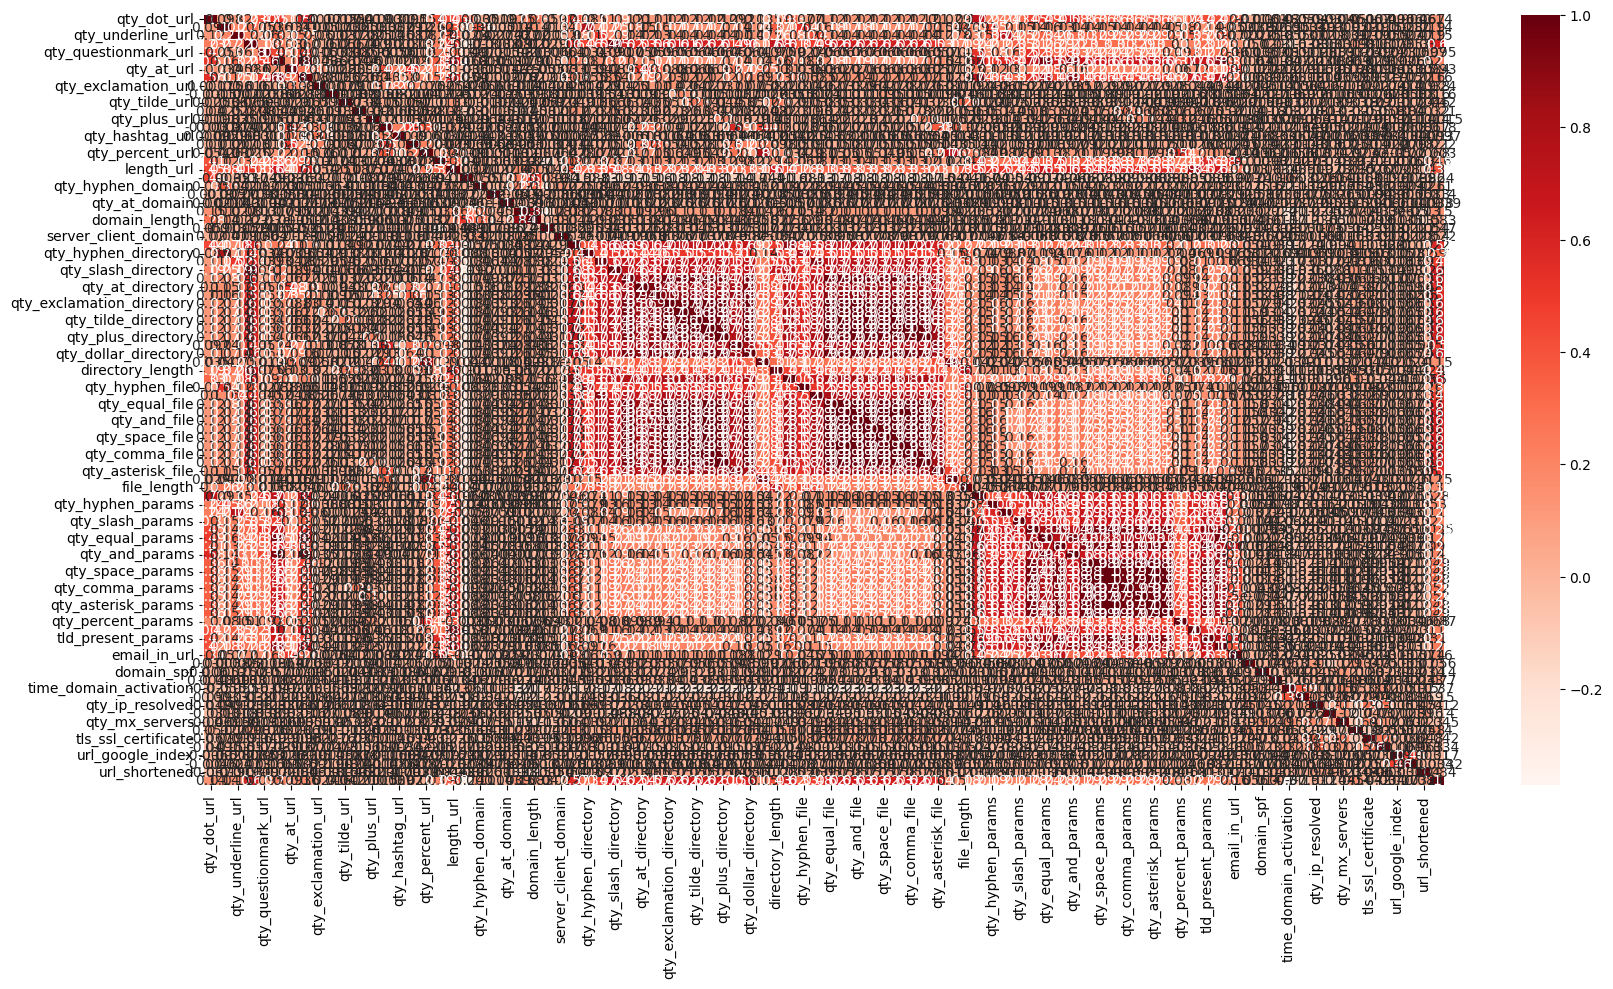

In [11]:
plt.figure(figsize=(20,10))
cor = normalized_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
cor_target = abs(cor["phishing"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

qty_slash_url                0.598533
qty_dot_directory            0.570226
qty_slash_directory          0.644812
qty_equal_directory          0.616014
qty_at_directory             0.540414
qty_and_directory            0.566306
qty_exclamation_directory    0.621736
qty_space_directory          0.618459
qty_tilde_directory          0.617932
qty_comma_directory          0.621645
qty_plus_directory           0.607731
qty_asterisk_directory       0.503458
qty_dollar_directory         0.611022
qty_dot_file                 0.618263
qty_equal_file               0.623972
qty_at_file                  0.626609
qty_and_file                 0.625704
qty_exclamation_file         0.625984
qty_space_file               0.622477
qty_tilde_file               0.625303
qty_comma_file               0.621802
qty_plus_file                0.611097
qty_asterisk_file            0.543109
phishing                     1.000000
Name: phishing, dtype: float64

In [13]:
print(relevant_features.index)

Index(['qty_slash_url', 'qty_dot_directory', 'qty_slash_directory',
       'qty_equal_directory', 'qty_at_directory', 'qty_and_directory',
       'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_dollar_directory', 'qty_dot_file',
       'qty_equal_file', 'qty_at_file', 'qty_and_file', 'qty_exclamation_file',
       'qty_space_file', 'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'phishing'],
      dtype='object')


In [14]:
normalized_df_new = normalized_df[relevant_features.index]

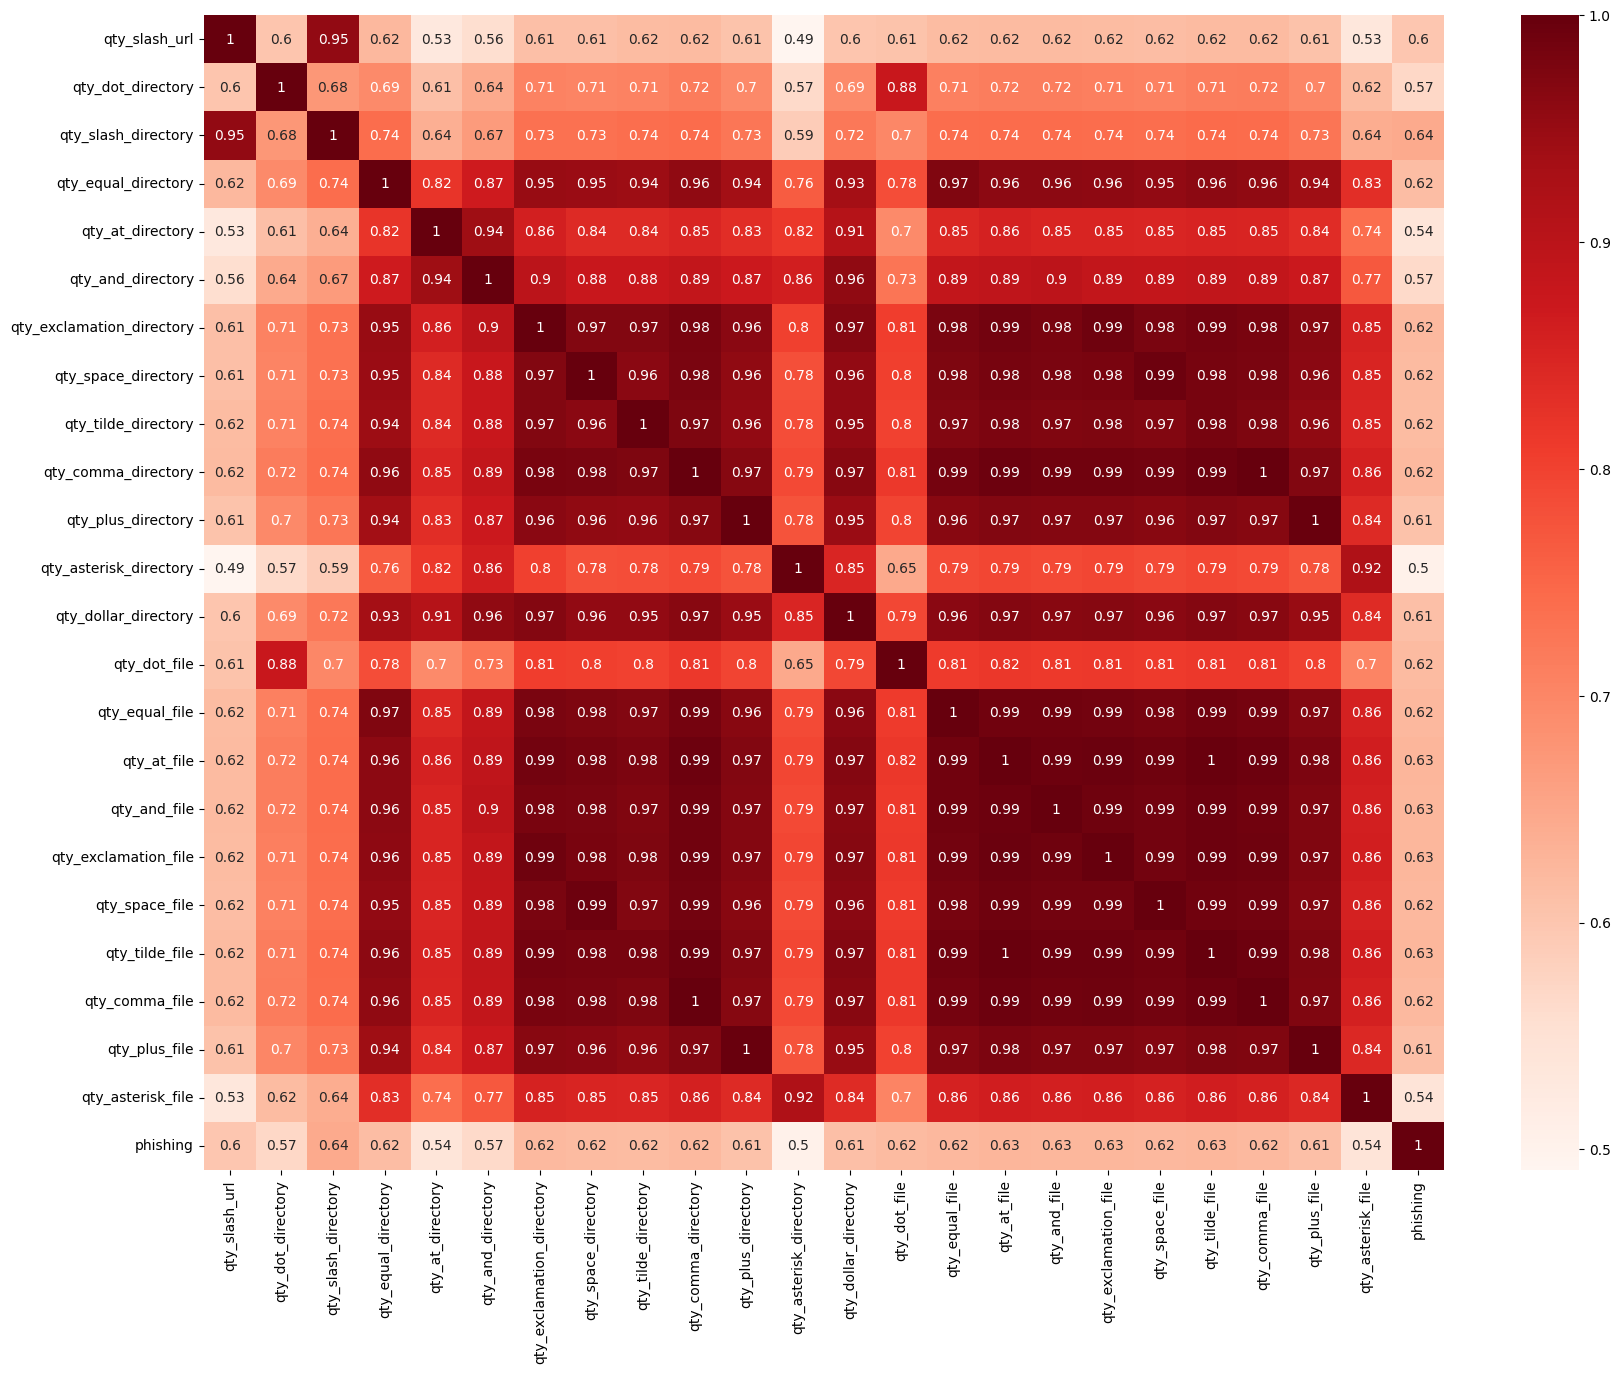

In [15]:
plt.figure(figsize=(20,15))
cor = normalized_df_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
y = normalized_df["phishing"]
X = normalized_df.iloc[: , :-1]

In [17]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
# search about this

Best alpha using built-in LassoCV: 0.000048
Best score using built-in LassoCV: 0.595985


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.712e+00, tolerance: 1.463e+00
  model = cd_fast.enet_coordinate_descent(


In [18]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 48 variables and eliminated the other 43 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

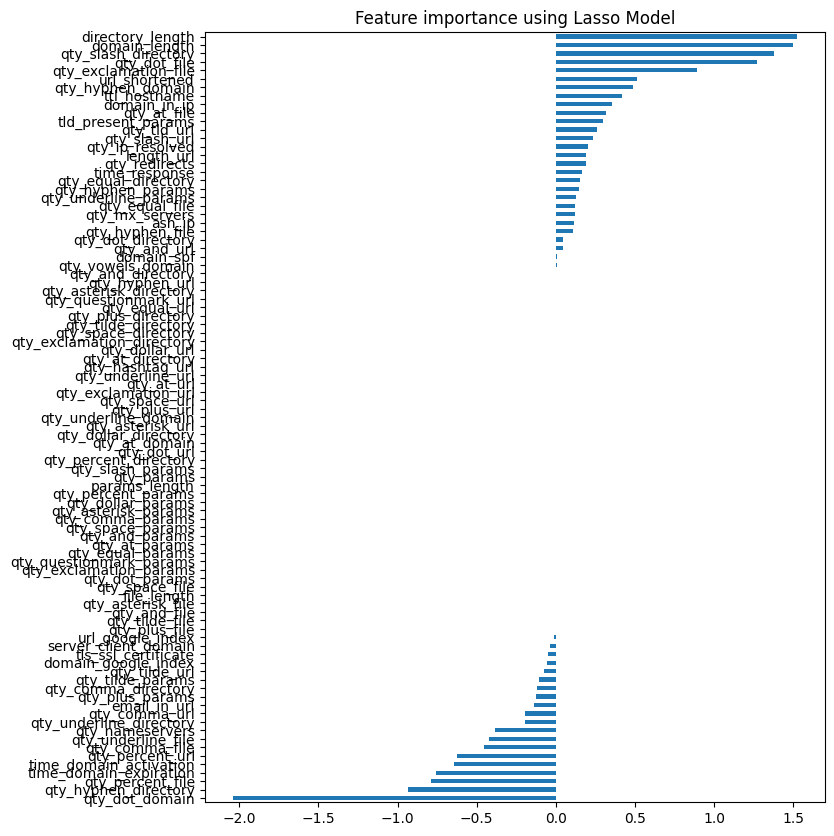

In [19]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [20]:
imp_coef

qty_dot_domain           -2.040995
qty_hyphen_directory     -0.934664
qty_percent_file         -0.789046
time_domain_expiration   -0.759548
time_domain_activation   -0.646099
                            ...   
qty_exclamation_file      0.890925
qty_dot_file              1.268837
qty_slash_directory       1.377969
domain_length             1.498313
directory_length          1.521512
Length: 91, dtype: float64

In [21]:
imp_features = imp_coef[imp_coef != 0].index
df = normalized_df[imp_coef[imp_coef != 0].index]

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
df = pca.fit_transform(df)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state=42)

In [25]:
from sklearn import svm
svm_model = svm.SVC().fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
svm_ascore = accuracy_score(y_test, y_pred,normalize = True)
svm_score = precision_recall_fscore_support(y_test, y_pred, average='macro')

In [26]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0, multi_class = "ovr").fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
lr_ascore = accuracy_score(y_test, y_pred,normalize = True)
lr_score = precision_recall_fscore_support(y_test, y_pred, average='macro')

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(max_depth=100, random_state=0).fit(X_train,y_train)
y_pred = rfc_model.predict(X_test)
rfc_ascore = accuracy_score(y_test,y_pred,normalize=True)
rfc_score = precision_recall_fscore_support(y_test, y_pred, average='macro')

In [28]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50).fit(X_train, y_train)
y_pred = clf.predict(X_test)
ada_ascore = accuracy_score(y_test,y_pred,normalize=True)
ada_score = precision_recall_fscore_support(y_test, y_pred, average='macro')

In [29]:
from sklearn.ensemble import VotingClassifier
estimators=[('svm', svm_model), ('rf', rfc_model), ('logreg', lr_model), ('ada', clf)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
voting_ascore = accuracy_score(y_test,y_pred,normalize=True)
voting_score = precision_recall_fscore_support(y_test, y_pred, average='macro')

In [30]:
labels = ['Support Vector Machine', 'Logistic Regression', 'Random Forest', 'AdaBoost', 'Voting']
accuracy_scores = [svm_ascore, lr_ascore, rfc_ascore, ada_ascore, voting_ascore]
precision_scores = [svm_score[0], lr_score[0], rfc_score[0], ada_score[0], voting_score[0]]
recall_scores = [svm_score[1], lr_score[1], rfc_score[1], ada_score[1], voting_score[1]]
f1_scores = [svm_score[2], lr_score[2], rfc_score[2], ada_score[2], voting_score[2]]

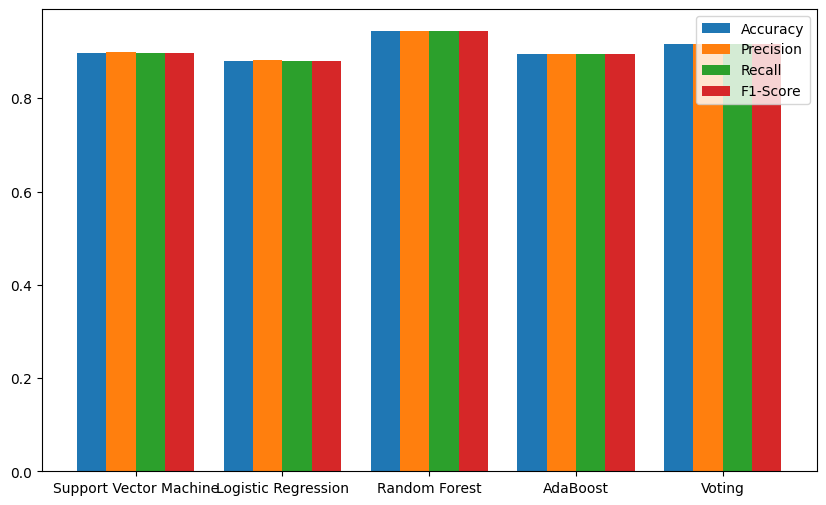

In [31]:
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width*1.5, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x - width/2, precision_scores, width, label='Precision')
rects3 = ax.bar(x + width/2, recall_scores, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1_scores, width, label='F1-Score')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
# Calculate the confusion matrix of the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[5134  462]
 [ 514 5619]]


In [35]:
tn, fp, fn, tp = conf_matrix.ravel()
error_rate = (fp + fn) / (tn + fp + fn + tp)
print(error_rate)

0.08321255008952169


In [34]:
# Generate a classification report of the model
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.92      0.91      5596
         1.0       0.92      0.92      0.92      6133

    accuracy                           0.92     11729
   macro avg       0.92      0.92      0.92     11729
weighted avg       0.92      0.92      0.92     11729

